In [16]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

In [36]:
from google.colab import drive

drive.mount('/content/drive')
csv_file_path = '/content/drive/My Drive/ML_Colab/merged_apple_price_news.csv'
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(csv_file_path)

# quedarse solo con el intervalo de fechas que tiene noticias
df = df[df['Date'].between('2012-07-01', '2020-02-01')]
# reset index
df = df.reset_index(drop=True)

print('Shape: ', df.shape)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Shape:  (1908, 13)


,Date,Close,High,Low,NEGATIVE,Open,POSITIVE,Volume,content,embedding,title,SMA_200,EMA_50
0,2012-07-02,17.890991,17.919676,17.621654,NaN,17.655775,NaN,400092000,NaN,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,NaN,14.722806,17.292412
1,2012-07-03,18.099030,18.116845,17.935677,NaN,17.962248,NaN,241712800,NaN,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,NaN,14.752836,17.324044
2,2012-07-05,18.416981,18.549837,18.106277,NaN,18.133753,NaN,484383200,NaN,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,NaN,14.782776,17.366904
3,2012-07-06,18.294384,18.371683,18.164548,NaN,18.330920,NaN,418930400,NaN,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,NaN,14.811828,17.403276
4,2012-07-09,18.536249,18.536551,18.240945,NaN,18.276876,NaN,379405600,NaN,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,NaN,14.842287,17.447706
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1903,2020-01-27,75.049576,75.734599,74.060897,5.206776,75.319211,2.793224,161940000,Technology giant Apple NASDAQ AAPL is set ...,[ 0.02834708 0.9416446 0.05614886 -0.011449...,Apple Set To Beat Q1 Earnings Estimates Tech ...,55.462338,69.933026
1904,2020-01-28,77.172661,77.345131,75.836611,NaN,75.936208,NaN,162234000,NaN,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,NaN,55.609115,70.216933
1905,2020-01-29,78.788063,79.640708,78.069027,NaN,78.814788,NaN,216229200,NaN,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,NaN,55.764064,70.553056
1906,2020-01-30,78.673889,78.727331,77.430150,NaN,77.864975,NaN,126743200,NaN,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,NaN,55.918011,70.871520


In [51]:
new_df = df[['Date', 'Close', 'NEGATIVE', 'POSITIVE']].copy()
new_df = new_df.rename(columns={'Date': 'ds', 'Close': 'y'})
new_df['ds'] = pd.to_datetime(new_df['ds'])
new_df['NEGATIVE'].fillna(0, inplace=True)
new_df['POSITIVE'].fillna(0, inplace=True)
new_df


,ds,y,NEGATIVE,POSITIVE
0,2012-07-02,17.890991,0.000000,0.000000
1,2012-07-03,18.099030,0.000000,0.000000
2,2012-07-05,18.416981,0.000000,0.000000
3,2012-07-06,18.294384,0.000000,0.000000
4,2012-07-09,18.536249,0.000000,0.000000
...,...,...,...,...
1903,2020-01-27,75.049576,5.206776,2.793224
1904,2020-01-28,77.172661,0.000000,0.000000
1905,2020-01-29,78.788063,0.000000,0.000000
1906,2020-01-30,78.673889,0.000000,0.000000


In [52]:
# Inicializa el modelo Prophet
model = Prophet()

model.add_regressor('NEGATIVE')
model.add_regressor('POSITIVE')

# Entrena el modelo con tus datos
model.fit(new_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbvgvavvm/4jsqma53.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbvgvavvm/16qla2qv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85314', 'data', 'file=/tmp/tmpbvgvavvm/4jsqma53.json', 'init=/tmp/tmpbvgvavvm/16qla2qv.json', 'output', 'file=/tmp/tmpbvgvavvm/prophet_modelydr0v2cc/prophet_model-20240925162635.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:26:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:26:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [55]:
# Crea un DataFrame para las fechas futuras
future = model.make_future_dataframe(periods=4)

future['POSITIVE'] = new_df['POSITIVE'].iloc[-1]
future['NEGATIVE'] = new_df['NEGATIVE'].iloc[-1]

# Realiza las predicciones
forecast = model.predict(future)
future

,ds,POSITIVE,NEGATIVE
0,2012-07-02,0.0,0.0
1,2012-07-03,0.0,0.0
2,2012-07-05,0.0,0.0
3,2012-07-06,0.0,0.0
4,2012-07-09,0.0,0.0
...,...,...,...
1907,2020-01-31,0.0,0.0
1908,2020-02-01,0.0,0.0
1909,2020-02-02,0.0,0.0
1910,2020-02-03,0.0,0.0


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


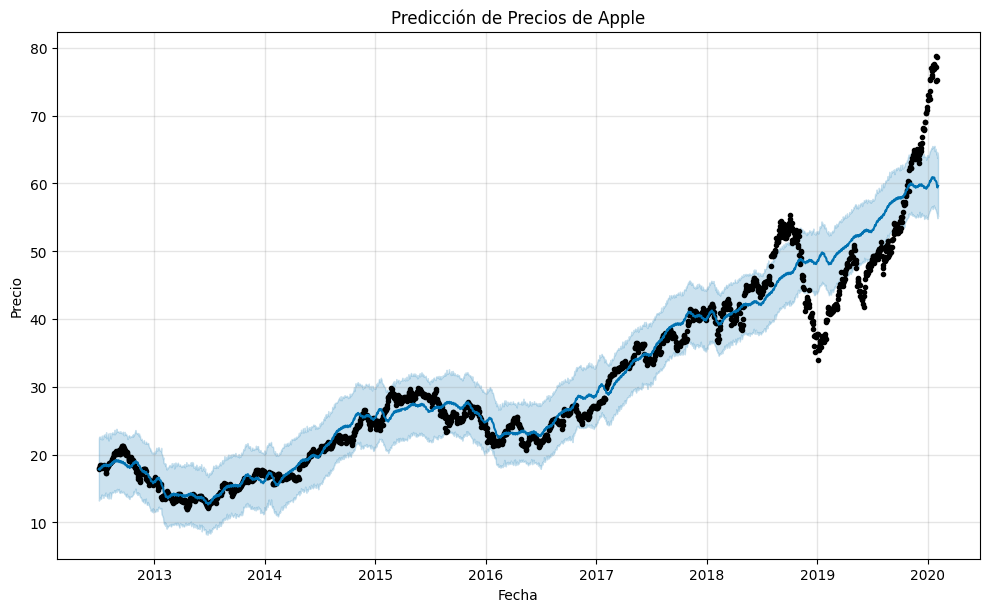

In [56]:
# Visualiza las predicciones
fig = model.plot(forecast)
plt.title('Predicción de Precios de Apple')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.show()

## Errores de Predicción

- Error Cuadrático Medio (MSE): Mide la magnitud promedio de los errores al cuadrado, dando más peso a los errores grandes.
- Error Absoluto Medio (MAE): Indica el error promedio en valor absoluto, sin importar la dirección del error.
- Error Porcentual Absoluto Medio (MAPE): Calcula el error promedio en términos porcentuales, lo que permite comparar el desempeño en diferentes escalas.
Estos errores te permitirán evaluar la precisión general de las predicciones de Prophet.

In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calcular errores de predicción
# Use the original dataframe length to select from forecast
mse = mean_squared_error(new_df['y'], forecast['yhat'][:len(new_df)])
mae = mean_absolute_error(new_df['y'], forecast['yhat'][:len(new_df)])
mape = np.mean(np.abs((new_df['y'] - forecast['yhat'][:len(new_df)]) / new_df['y'])) * 100

print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'MAPE: {mape:.2f}%')

MSE: 12.35
MAE: 2.21
MAPE: 6.33%


**Predicciones con convariables**